In [1]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ustawienie wyświetlania wszystkich kolumn oraz wierszy
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
# wczytanie danych
path = "CIC-IDS-2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df = pd.read_csv(path, low_memory=False)

In [4]:
# usunięcie białych znaków z nazw kolumn
df.columns = df.columns.str.strip()

In [5]:
# wyświetlenie wszystkich kolumn wraz z typami
column_info = pd.DataFrame({
    'Feature No': np.arange(1, len(df.columns)+1),
    'Feature name': df.columns,
    'Data type': [df[col].dtype for col in df.columns]
})


split_idx = len(column_info) // 2 + len(column_info) % 2
left = column_info.iloc[:split_idx].reset_index(drop=True)
right = column_info.iloc[split_idx:].reset_index(drop=True)


print(f"{'Feature No':<10} {'Feature name':<35} {'Data type':<10}     ||     {'Feature No':<10} {'Feature name':<35} {'Data type':<10}")
print(f"{'-'*10} {'-'*35} {'-'*10}     ||     {'-'*10} {'-'*35} {'-'*10}")


for i in range(len(left)):
    left_row = f"{left['Feature No'][i]:<10} {left['Feature name'][i]:<35} {str(left['Data type'][i]):<10}"
    if i < len(right):
        right_row = f"{right['Feature No'][i]:<10} {right['Feature name'][i]:<35} {str(right['Data type'][i]):<10}"
    else:
        right_row = ""
    print(f"{left_row}     ||     {right_row}")

Feature No Feature name                        Data type      ||     Feature No Feature name                        Data type 
---------- ----------------------------------- ----------     ||     ---------- ----------------------------------- ----------
1          Destination Port                    int64          ||     41         Packet Length Mean                  float64   
2          Flow Duration                       int64          ||     42         Packet Length Std                   float64   
3          Total Fwd Packets                   int64          ||     43         Packet Length Variance              float64   
4          Total Backward Packets              int64          ||     44         FIN Flag Count                      int64     
5          Total Length of Fwd Packets         int64          ||     45         SYN Flag Count                      int64     
6          Total Length of Bwd Packets         int64          ||     46         RST Flag Count                 

In [6]:
# wyświetlenie pierwszych 5 wierszy
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Rozmiar danych (rekordy, kolumny): (225745, 79)


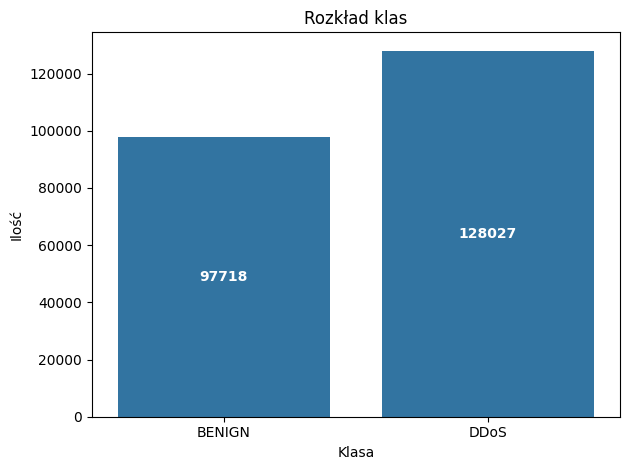

In [ ]:
# wyświetlanie rozkładu klas
print("Rozmiar danych (rekordy, kolumny):", df.shape)

ax = sns.countplot(data=df, x='Label')
plt.title('Rozkład klas')
plt.xlabel('Klasa')
plt.ylabel('Ilość')
plt.tight_layout()


for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height / 2,
        f'{int(height)}',
        ha='center', va='center',
        color='white', fontsize=10, fontweight='bold'
    )

plt.show()

In [9]:
# Zamienie wartości kolumnu Label na wartości liczbowe 0 - BENIGN, 1 - DDoS
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [10]:
# Usunięcie kolumy Destination Port
df = df.drop(columns=['Destination Port'])

In [11]:
# usunięcie kolumn w których są wszystkie te same wartości
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

print("Usunięto kolumny z identycznymi wartościami we wszystkich wierszach:")
for col in cols_to_drop:
    print(f" - {col} (wartość: {df[col].iloc[0]})")

df = df.drop(columns=cols_to_drop)
print("Rozmiar danych (rekordy, kolumny):", df.shape)

Usunięto kolumny z identycznymi wartościami we wszystkich wierszach:
 - Bwd PSH Flags (wartość: 0)
 - Fwd URG Flags (wartość: 0)
 - Bwd URG Flags (wartość: 0)
 - CWE Flag Count (wartość: 0)
 - Fwd Avg Bytes/Bulk (wartość: 0)
 - Fwd Avg Packets/Bulk (wartość: 0)
 - Fwd Avg Bulk Rate (wartość: 0)
 - Bwd Avg Bytes/Bulk (wartość: 0)
 - Bwd Avg Packets/Bulk (wartość: 0)
 - Bwd Avg Bulk Rate (wartość: 0)
Rozmiar danych (rekordy, kolumny): (225745, 68)


In [12]:
# rozdzielenie zbioru w celu wypełnienia brakujących wartości średnią
benign = df[df['Label'] == 0]
ddos = df[df['Label'] == 1]

In [13]:
# wyświetlenie brakujących wartości oraz warości nieskończonych
print(benign.isna().sum())
print(np.isinf(benign).sum())

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   4
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Flags                  0
Fwd Header

In [14]:
# zamiana wartości nieskończonych na puste i wypełnienie średnią ze zbioru
benign = benign.replace([np.inf, -np.inf], np.nan)
benign = benign.fillna(benign.mean())

In [15]:
# wyświetlenie brakujących wartości oraz warości nieskończonych
print(ddos.isna().sum())
print(np.isinf(ddos).sum())

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Flags                  0
Fwd Header

In [16]:
# zamiana wartości nieskończonych na puste i wypełnienie średnią ze zbioru
ddos = ddos.replace([np.inf, -np.inf], np.nan)
ddos = ddos.fillna(ddos.mean())

In [17]:
# połączenie zbioru oraz losowe przetasowanie wierszy
df = pd.concat([benign, ddos], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

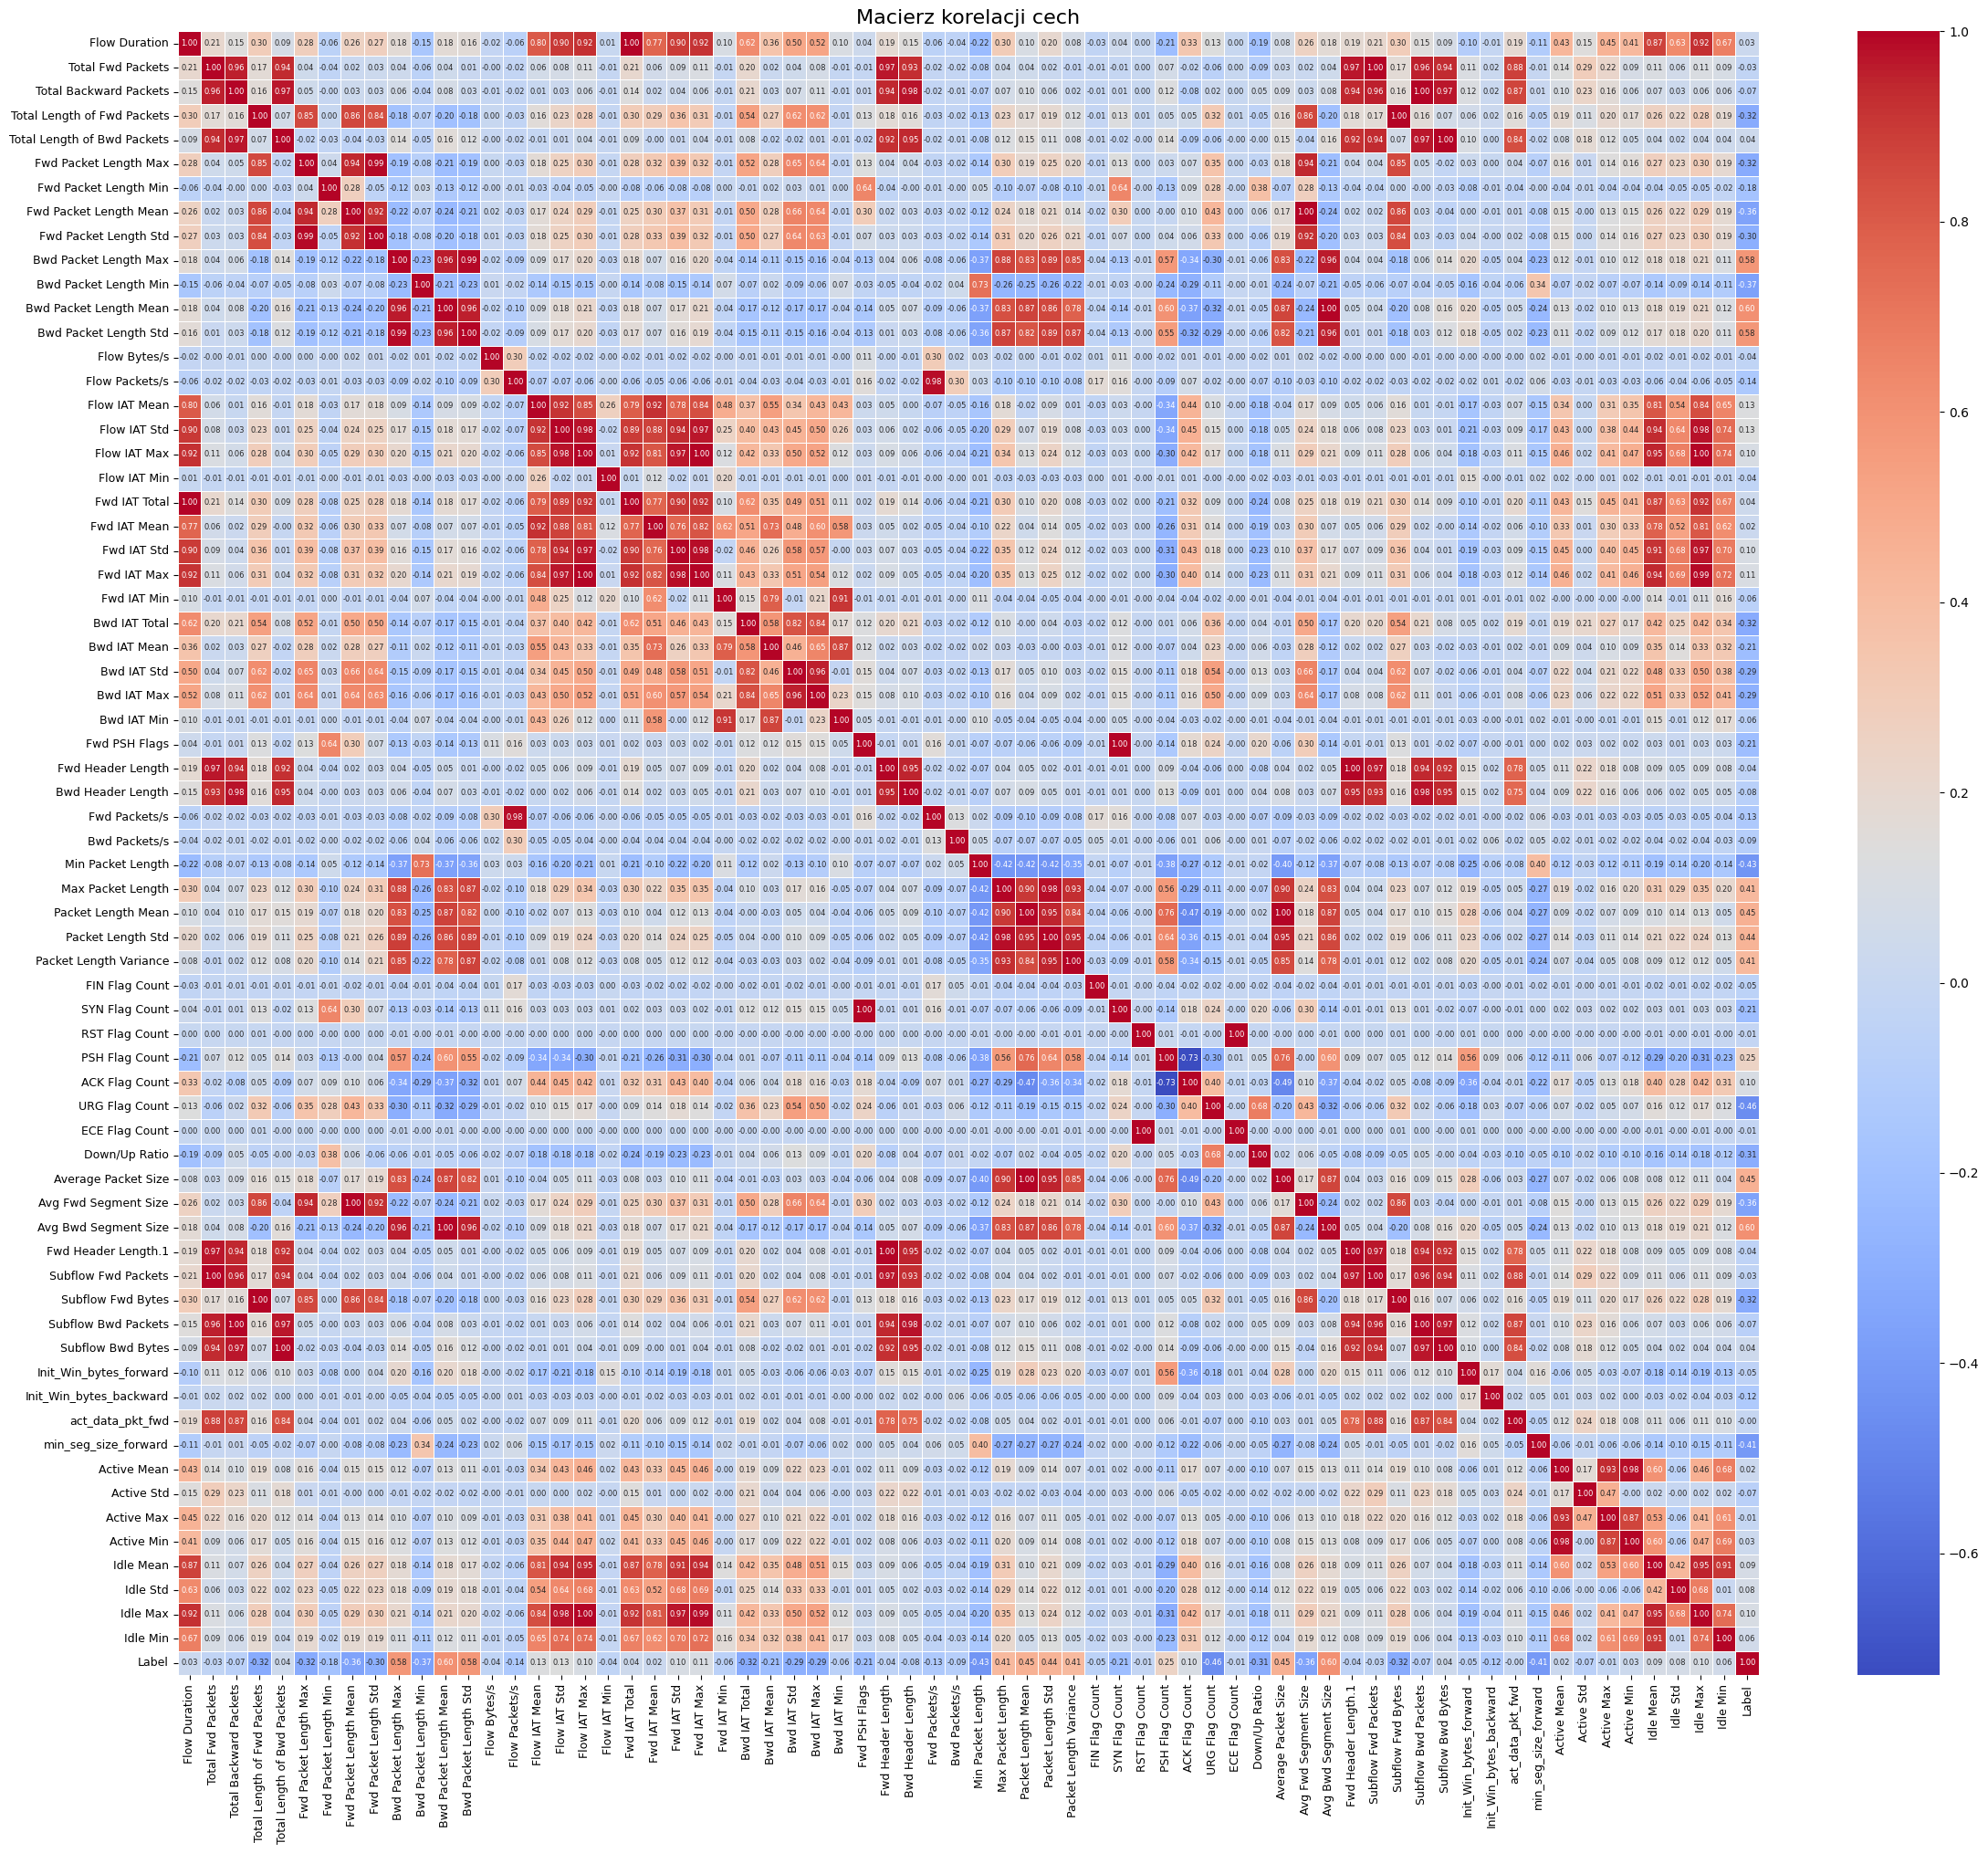

In [18]:
# wyświetlenie macierzy korelacji cech
corr_matrix = df.corr()

plt.figure(figsize=(max(12, 0.35 * len(corr_matrix.columns)), max(10, 0.3 * len(corr_matrix.columns))))

sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={'size': 6},
    cbar=True
)

plt.title('Macierz korelacji cech', fontsize=16)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

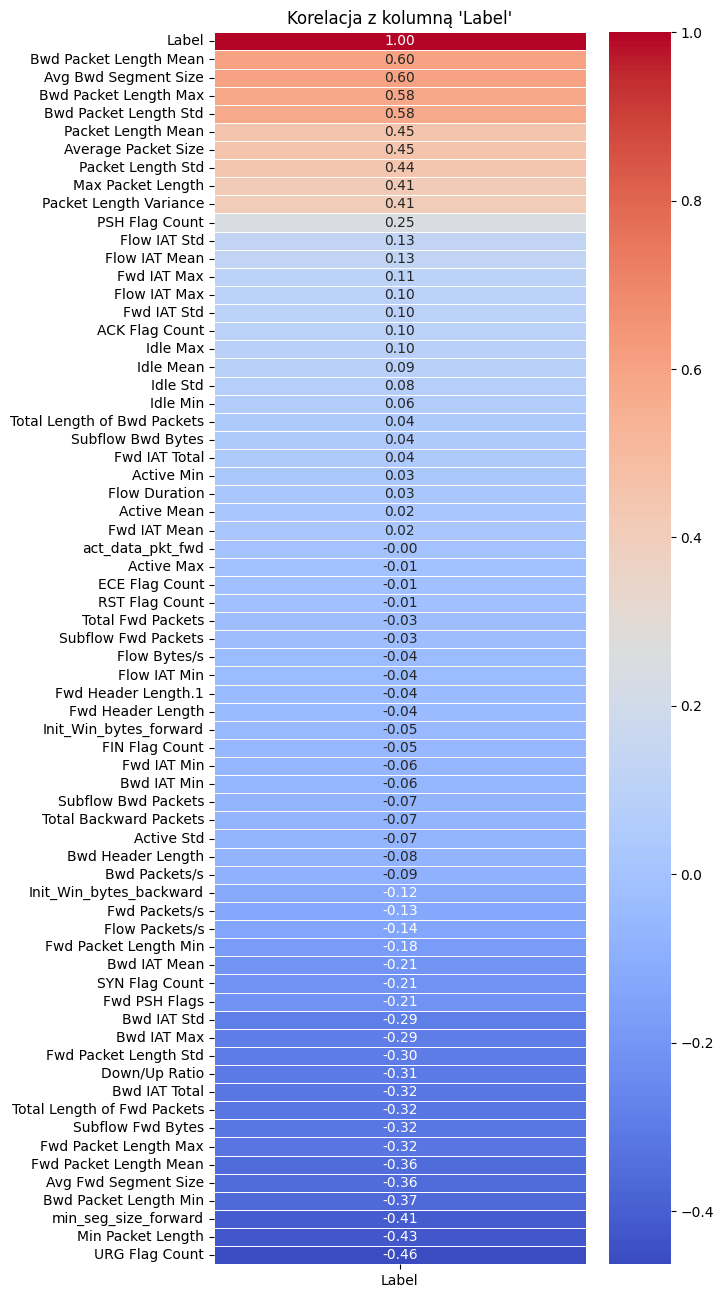

In [19]:
# wyświetlenie koleralcji cech z kolumną Label
correlation_with_binary_label = df.corr()['Label'].sort_values(ascending=False)

plt.figure(figsize=(6, 16))
sns.heatmap(correlation_with_binary_label.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelacja z kolumną 'Label'")
plt.show()

In [20]:
# Zapis obrobionych danych do pliku CSV
df.to_csv('2017.csv', index=False)


In [ ]:
# wczytanie danych z innych zbiorów
path_2 = "CICDDoS2019/01-12/DrDoS_DNS.csv"
df_2 = pd.read_csv(path_2, low_memory=False)

path_3 = "CICDDoS2019/01-12/DrDoS_NTP.csv"
df_3 = pd.read_csv(path_3, low_memory=False)

path_4 = "CICDDoS2019/01-12/Syn.csv"
df_4 = pd.read_csv(path_4, low_memory=False)

path_5 = "CICDDoS2019/03-11/LDAP.csv"
df_5 = pd.read_csv(path_5, low_memory=False)

path_6 = "CICDDoS2019/03-11/Portmap.csv"
df_6 = pd.read_csv(path_6, low_memory=False)

In [23]:
# usunięcie białych znaków z nazw kolumn
df_2.columns = df_2.columns.str.strip()
df_3.columns = df_3.columns.str.strip()
df_4.columns = df_4.columns.str.strip()
df_5.columns = df_5.columns.str.strip()
df_6.columns = df_6.columns.str.strip()

In [24]:
# wyświetlenie wszystkich kolumn wraz z typami
column_info = pd.DataFrame({
    'Feature No': np.arange(1, len(df_2.columns)+1),
    'Feature name': df_2.columns,
    'Data type': [df_2[col].dtype for col in df_2.columns]
})


split_idx = len(column_info) // 2 + len(column_info) % 2
left = column_info.iloc[:split_idx].reset_index(drop=True)
right = column_info.iloc[split_idx:].reset_index(drop=True)


print(f"{'Feature No':<10} {'Feature name':<35} {'Data type':<10}     ||     {'Feature No':<10} {'Feature name':<35} {'Data type':<10}")
print(f"{'-'*10} {'-'*35} {'-'*10}     ||     {'-'*10} {'-'*35} {'-'*10}")


for i in range(len(left)):
    left_row = f"{left['Feature No'][i]:<10} {left['Feature name'][i]:<35} {str(left['Data type'][i]):<10}"
    if i < len(right):
        right_row = f"{right['Feature No'][i]:<10} {right['Feature name'][i]:<35} {str(right['Data type'][i]):<10}"
    else:
        right_row = ""
    print(f"{left_row}     ||     {right_row}")

Feature No Feature name                        Data type      ||     Feature No Feature name                        Data type 
---------- ----------------------------------- ----------     ||     ---------- ----------------------------------- ----------
1          Unnamed: 0                          int64          ||     45         Bwd Packets/s                       float64   
2          Flow ID                             object         ||     46         Min Packet Length                   float64   
3          Source IP                           object         ||     47         Max Packet Length                   float64   
4          Source Port                         int64          ||     48         Packet Length Mean                  float64   
5          Destination IP                      object         ||     49         Packet Length Std                   float64   
6          Destination Port                    int64          ||     50         Packet Length Variance         

In [25]:
# Sprawdzenie liczebności próbek w klasach
print(sorted(Counter(df_2["Label"]).items()))
print(sorted(Counter(df_3["Label"]).items()))
print(sorted(Counter(df_4["Label"]).items()))
print(sorted(Counter(df_5["Label"]).items()))
print(sorted(Counter(df_6["Label"]).items()))

[('BENIGN', 3402), ('DrDoS_DNS', 5071011)]
[('BENIGN', 14365), ('DrDoS_NTP', 1202642)]
[('BENIGN', 392), ('Syn', 1582289)]
[('BENIGN', 5124), ('LDAP', 1905191), ('NetBIOS', 202919)]
[('BENIGN', 4734), ('Portmap', 186960)]


In [26]:
# Filtrowanie
benign2 = df_2[df_2['Label'] == 'BENIGN']
benign3 = df_3[df_3['Label'] == 'BENIGN']
benign4 = df_4[df_4['Label'] == 'BENIGN']
benign5 = df_5[df_5['Label'] == 'BENIGN']
benign6 = df_6[df_6['Label'] == 'BENIGN']

# Łączenie w jeden zbiór
benign_combined = pd.concat([benign2, benign3, benign4, benign5, benign6], ignore_index=True)


In [ ]:
# Zamienie wartości kolumnu Label na wartości liczbowe 0 - BENIGN, 1 - DDoS
label_encoder = LabelEncoder()
benign_combined['Label'] = label_encoder.fit_transform(benign_combined['Label'])

In [28]:
# usunięcie kolumn tekstowych, które nie niosą użytecznych wartości
benign_combined = benign_combined.drop(benign_combined.columns[0], axis=1)
benign_combined = benign_combined.drop(columns=['Source IP'])
benign_combined = benign_combined.drop(columns=['Destination IP'])
benign_combined = benign_combined.drop(columns=['Flow ID'])
benign_combined = benign_combined.drop(columns=['Timestamp'])
benign_combined = benign_combined.drop(columns=['SimillarHTTP'])
benign_combined = benign_combined.drop(columns=['Inbound'])
benign_combined = benign_combined.drop(columns=['Protocol'])
benign_combined = benign_combined.drop(columns=['Destination Port'])
benign_combined = benign_combined.drop(columns=['Source Port'])

In [ ]:
# wyświetlenie brakujących wartości oraz warości nieskończonych
print(benign_combined.isna().sum())
print(np.isinf(benign_combined).sum())

Flow Duration                   0
Total Fwd Packets               0
Total Backward Packets          0
Total Length of Fwd Packets     0
Total Length of Bwd Packets     0
Fwd Packet Length Max           0
Fwd Packet Length Min           0
Fwd Packet Length Mean          0
Fwd Packet Length Std           0
Bwd Packet Length Max           0
Bwd Packet Length Min           0
Bwd Packet Length Mean          0
Bwd Packet Length Std           0
Flow Bytes/s                   67
Flow Packets/s                  0
Flow IAT Mean                   0
Flow IAT Std                    0
Flow IAT Max                    0
Flow IAT Min                    0
Fwd IAT Total                   0
Fwd IAT Mean                    0
Fwd IAT Std                     0
Fwd IAT Max                     0
Fwd IAT Min                     0
Bwd IAT Total                   0
Bwd IAT Mean                    0
Bwd IAT Std                     0
Bwd IAT Max                     0
Bwd IAT Min                     0
Fwd PSH Flags 

In [ ]:
# Zastąpienie wartości nieskończonych oraz wypełnienie średnią brakujących wartości
benign_combined = benign_combined.replace([np.inf, -np.inf], np.nan)
benign_combined = benign_combined.fillna(benign_combined.mean())

In [ ]:
# Usunięcie kolumn, które nie niosą przydatnych wartości

df_2 = df_2.drop(df_2.columns[0], axis=1)
df_2 = df_2.drop(columns=['Source IP'])
df_2 = df_2.drop(columns=['Destination IP'])
df_2 = df_2.drop(columns=['Flow ID'])
df_2 = df_2.drop(columns=['Timestamp'])
df_2 = df_2.drop(columns=['SimillarHTTP'])
df_2 = df_2.drop(columns=['Inbound'])
df_2 = df_2.drop(columns=['Protocol'])
df_2 = df_2.drop(columns=['Destination Port'])
df_2 = df_2.drop(columns=['Source Port'])

df_3 = df_3.drop(df_3.columns[0], axis=1)
df_3 = df_3.drop(columns=['Source IP'])
df_3 = df_3.drop(columns=['Destination IP'])
df_3 = df_3.drop(columns=['Flow ID'])
df_3 = df_3.drop(columns=['Timestamp'])
df_3 = df_3.drop(columns=['SimillarHTTP'])
df_3 = df_3.drop(columns=['Inbound'])
df_3 = df_3.drop(columns=['Protocol'])
df_3 = df_3.drop(columns=['Destination Port'])
df_3 = df_3.drop(columns=['Source Port'])

df_4 = df_4.drop(df_4.columns[0], axis=1)
df_4 = df_4.drop(columns=['Source IP'])
df_4 = df_4.drop(columns=['Destination IP'])
df_4 = df_4.drop(columns=['Flow ID'])
df_4 = df_4.drop(columns=['Timestamp'])
df_4 = df_4.drop(columns=['SimillarHTTP'])
df_4 = df_4.drop(columns=['Inbound'])
df_4 = df_4.drop(columns=['Protocol'])
df_4 = df_4.drop(columns=['Destination Port'])
df_4 = df_4.drop(columns=['Source Port'])

df_5 = df_5.drop(df_5.columns[0], axis=1)
df_5 = df_5.drop(columns=['Source IP'])
df_5 = df_5.drop(columns=['Destination IP'])
df_5 = df_5.drop(columns=['Flow ID'])
df_5 = df_5.drop(columns=['Timestamp'])
df_5 = df_5.drop(columns=['SimillarHTTP'])
df_5 = df_5.drop(columns=['Inbound'])
df_5 = df_5.drop(columns=['Protocol'])
df_5 = df_5.drop(columns=['Destination Port'])
df_5 = df_5.drop(columns=['Source Port'])

df_6 = df_6.drop(df_6.columns[0], axis=1)
df_6 = df_6.drop(columns=['Source IP'])
df_6 = df_6.drop(columns=['Destination IP'])
df_6 = df_6.drop(columns=['Flow ID'])
df_6 = df_6.drop(columns=['Timestamp'])
df_6 = df_6.drop(columns=['SimillarHTTP'])
df_6 = df_6.drop(columns=['Inbound'])
df_6 = df_6.drop(columns=['Protocol'])
df_6 = df_6.drop(columns=['Destination Port'])
df_6 = df_6.drop(columns=['Source Port'])

# Filtracja opowiednich próbek
dns = df_2[df_2['Label'] == 'DrDoS_DNS']
ntp = df_3[df_3['Label'] == 'DrDoS_NTP']
syn = df_4[df_4['Label'] == 'Syn']
ldap = df_5[df_5['Label'] == 'LDAP']
netbios = df_5[df_5['Label'] == 'NetBIOS']
portmap = df_6[df_6['Label'] == 'Portmap']

dns_sampled = dns.sample(n=5000, random_state=42)
ntp_sampled = ntp.sample(n=5000, random_state=42)
syn_sampled = syn.sample(n=5000, random_state=42)
ldap_sampled = ldap.sample(n=5000, random_state=42)
netbios_sampled = netbios.sample(n=5000, random_state=42)
portmap_sampled = portmap.sample(n=5000, random_state=42)

dns_sampled['Label'] = 1
ntp_sampled['Label'] = 1
syn_sampled['Label'] = 1
ldap_sampled['Label'] = 1
netbios_sampled['Label'] = 1
portmap_sampled['Label'] = 1

# Zastąpienie średnią wartością brakujących oraz nieskończonych wartości
dns_sampled = dns_sampled.replace([np.inf, -np.inf], np.nan)
dns_sampled = dns_sampled.fillna(dns_sampled.mean())
ntp_sampled = ntp_sampled.replace([np.inf, -np.inf], np.nan)
ntp_sampled = ntp_sampled.fillna(ntp_sampled.mean())
syn_sampled = syn_sampled.replace([np.inf, -np.inf], np.nan)
syn_sampled = syn_sampled.fillna(syn_sampled.mean())
ldap_sampled = ldap_sampled.replace([np.inf, -np.inf], np.nan)
ldap_sampled = ldap_sampled.fillna(ldap_sampled.mean())
netbios_sampled = netbios_sampled.replace([np.inf, -np.inf], np.nan)
netbios_sampled = netbios_sampled.fillna(netbios_sampled.mean())
portmap_sampled = portmap_sampled.replace([np.inf, -np.inf], np.nan)
portmap_sampled = portmap_sampled.fillna(portmap_sampled.mean())

dns_sampled['Label'] = 'DDoS'
ntp_sampled['Label'] = 'DDoS'
syn_sampled['Label'] = 'DDoS'
ldap_sampled['Label'] = 'DDoS'
netbios_sampled['Label'] = 'DDoS'
portmap_sampled['Label'] = 'DDoS'

# połączenie zbiorów
df_balanced = pd.concat([dns_sampled, ntp_sampled, syn_sampled, ldap_sampled, netbios_sampled, portmap_sampled], ignore_index=True)


In [ ]:
benign_combined['Label'] = 'BENIGN'
combined_df = pd.concat([benign_combined, df_balanced], ignore_index=True)

# Losowe przetasowanie wierszy
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Sprawdzenie liczebności próbek w klasach
print(sorted(Counter(combined_df["Label"]).items()))

[('BENIGN', 28017), ('DDoS', 30000)]


Rozmiar danych (rekordy, kolumny): (58017, 78)


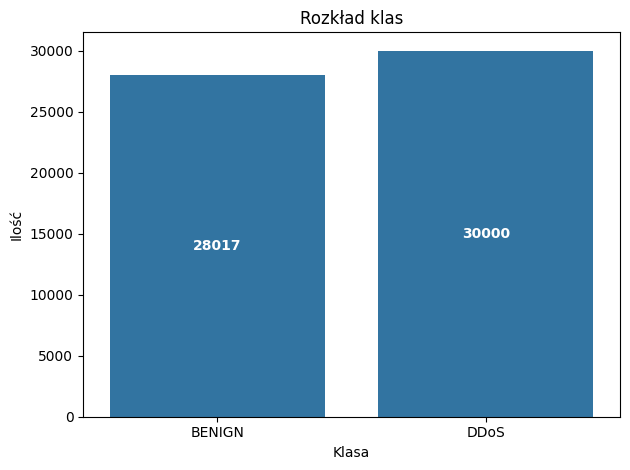

In [34]:
# wyświetlanie rozmiaru danych oraz rozkładu klas
print("Rozmiar danych (rekordy, kolumny):", combined_df.shape)

ax = sns.countplot(data=combined_df, x='Label')
plt.title('Rozkład klas')
plt.xlabel('Klasa')
plt.ylabel('Ilość')
plt.tight_layout()


for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height / 2,
        f'{int(height)}',
        ha='center', va='center',
        color='white', fontsize=10, fontweight='bold'
    )

plt.show()

In [35]:
# Zamienie wartości kolumnu Label na wartości liczbowe 0 - BENIGN, 1 - DDoS
label_encoder = LabelEncoder()
combined_df['Label'] = label_encoder.fit_transform(combined_df['Label'])
print(sorted(Counter(combined_df["Label"]).items()))

[(0, 28017), (1, 30000)]


In [36]:
# usunięcie kolumn w których są wszystkie te same wartości
cols_to_drop = [col for col in combined_df.columns if combined_df[col].nunique() == 1]

print("Usunięto kolumny z identycznymi wartościami we wszystkich wierszach:")
for col in cols_to_drop:
    print(f" - {col} (wartość: {combined_df[col].iloc[0]})")

combined_df = combined_df.drop(columns=cols_to_drop)
print("Rozmiar danych (rekordy, kolumny):", combined_df.shape)

Usunięto kolumny z identycznymi wartościami we wszystkich wierszach:
 - Bwd PSH Flags (wartość: 0)
 - Fwd URG Flags (wartość: 0)
 - Bwd URG Flags (wartość: 0)
 - FIN Flag Count (wartość: 0)
 - PSH Flag Count (wartość: 0)
 - ECE Flag Count (wartość: 0)
 - Fwd Avg Bytes/Bulk (wartość: 0)
 - Fwd Avg Packets/Bulk (wartość: 0)
 - Fwd Avg Bulk Rate (wartość: 0)
 - Bwd Avg Bytes/Bulk (wartość: 0)
 - Bwd Avg Packets/Bulk (wartość: 0)
 - Bwd Avg Bulk Rate (wartość: 0)
Rozmiar danych (rekordy, kolumny): (58017, 66)


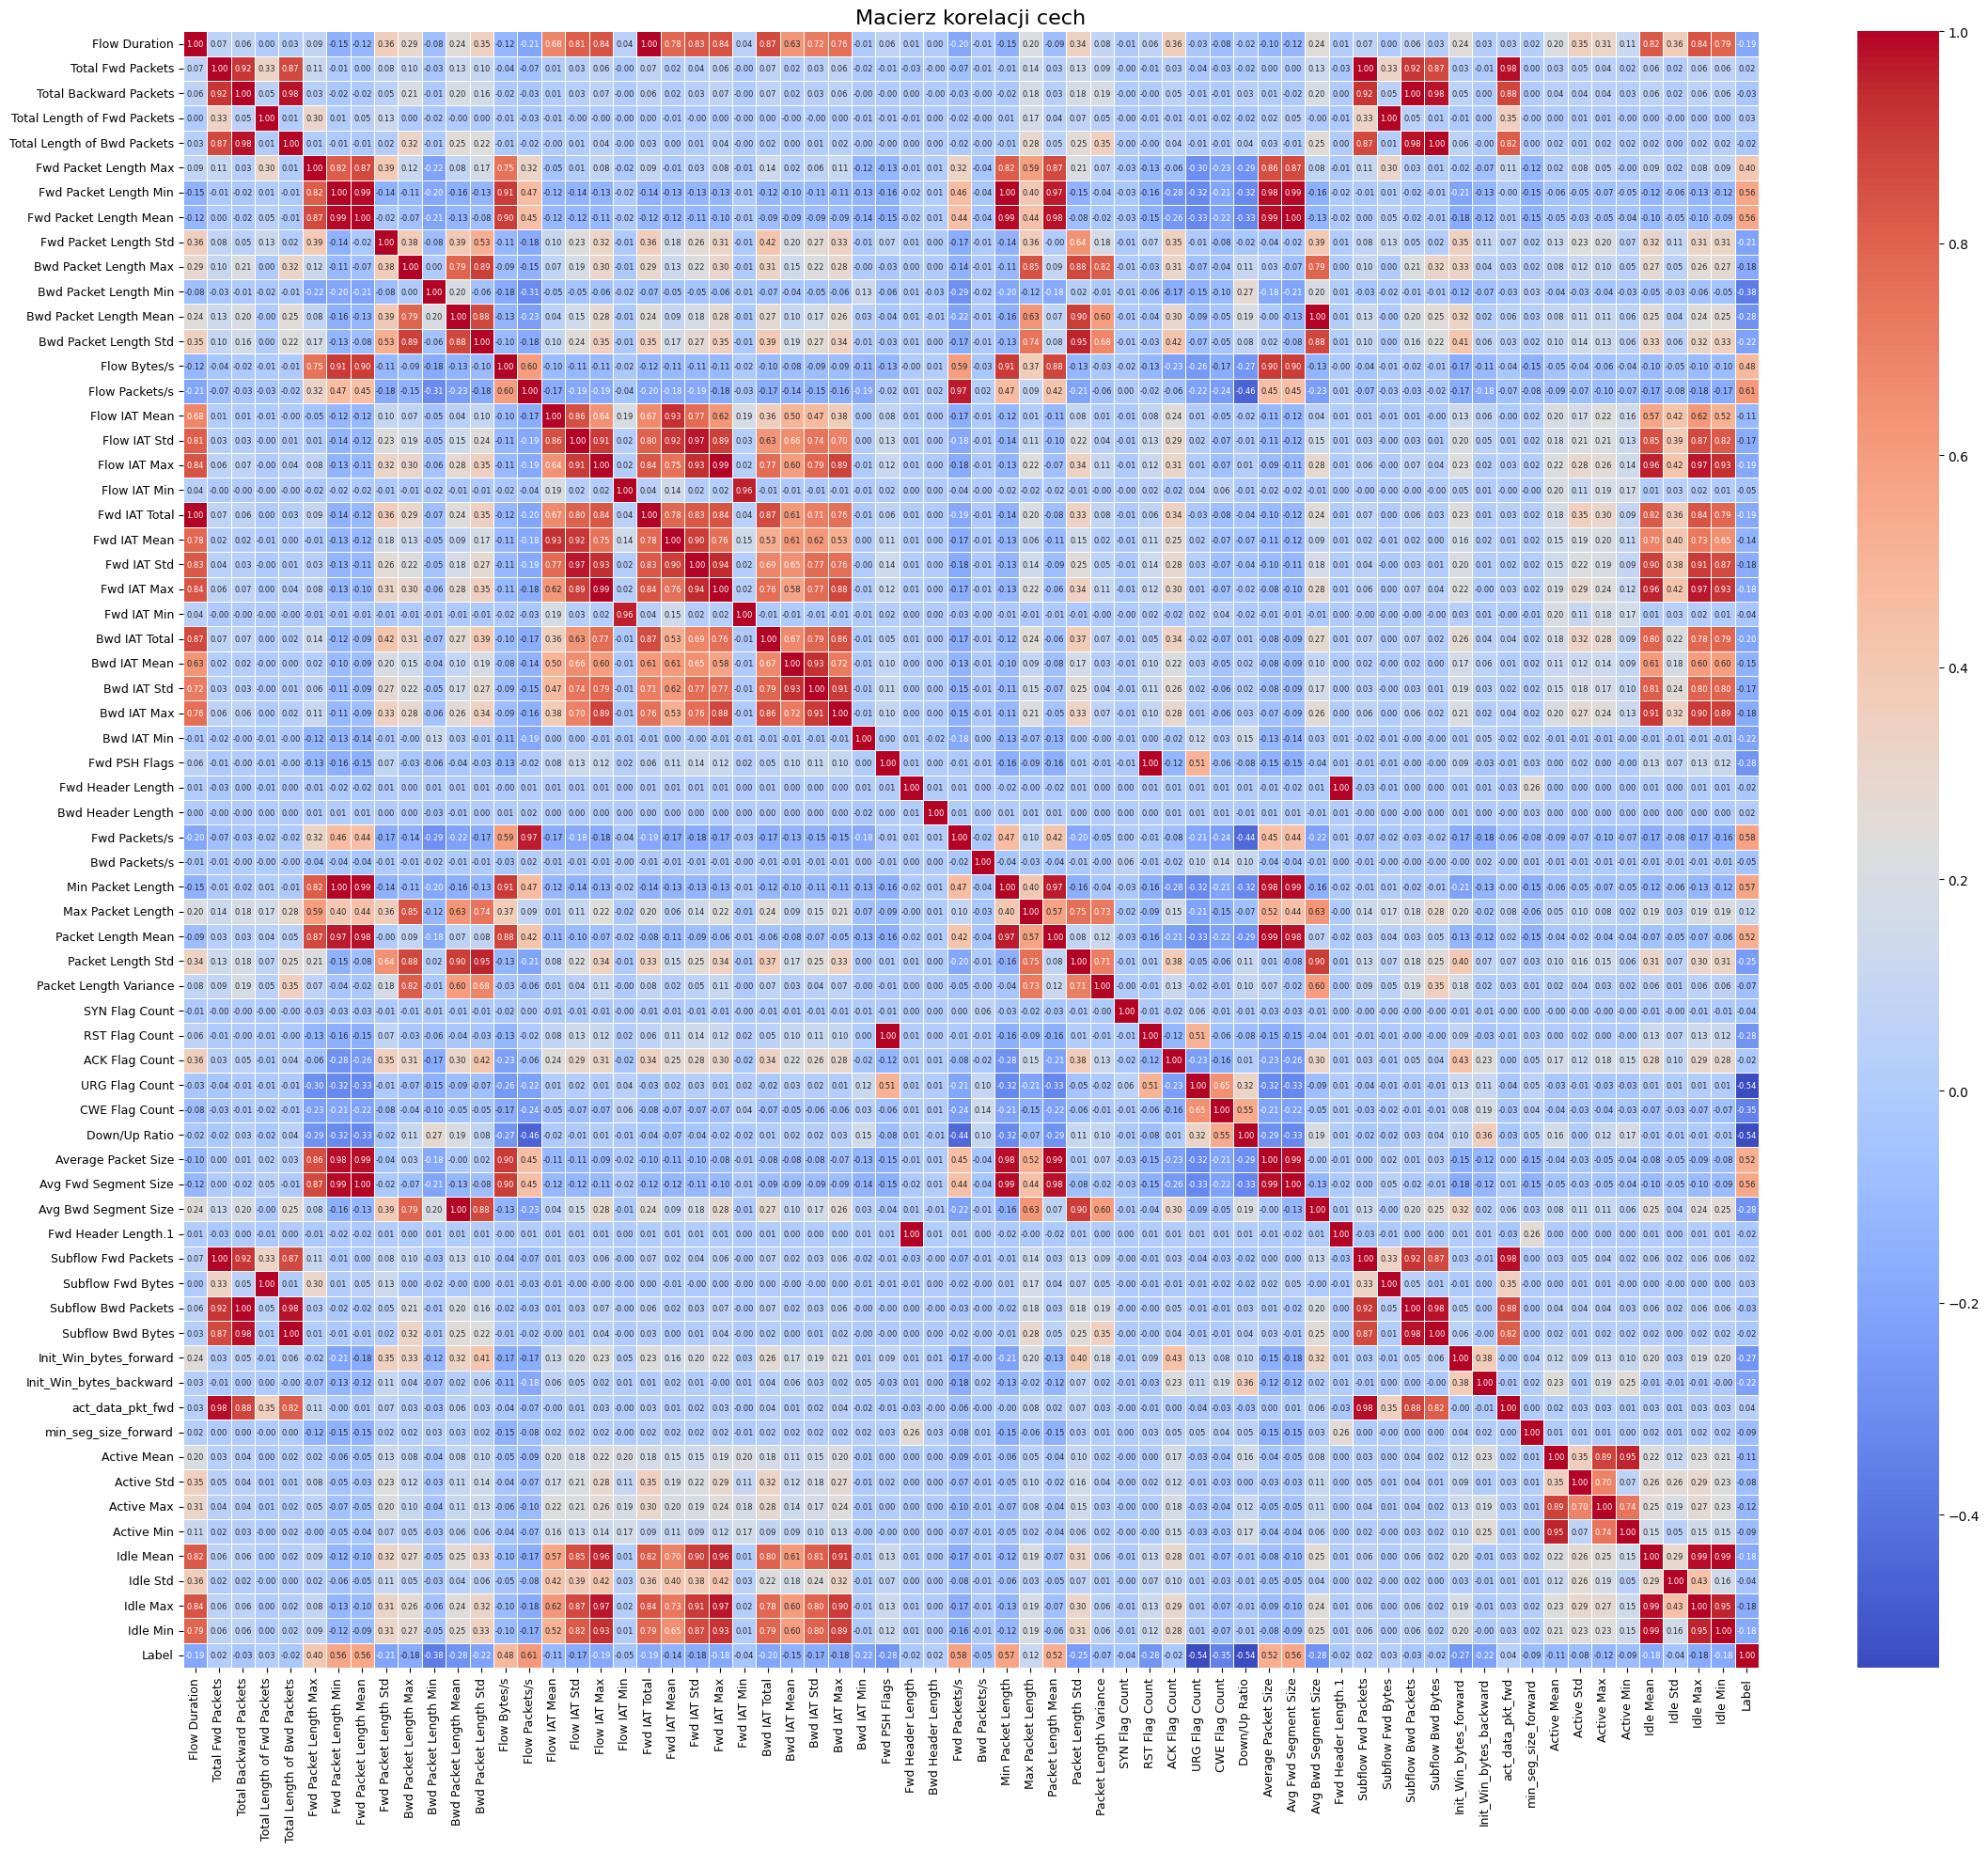

In [37]:
# wyświetlenie macierzy korelacji cech
corr_matrix = combined_df.corr()

plt.figure(figsize=(max(12, 0.35 * len(corr_matrix.columns)), max(10, 0.3 * len(corr_matrix.columns))))

sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={'size': 6},
    cbar=True
)

plt.title('Macierz korelacji cech', fontsize=16)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

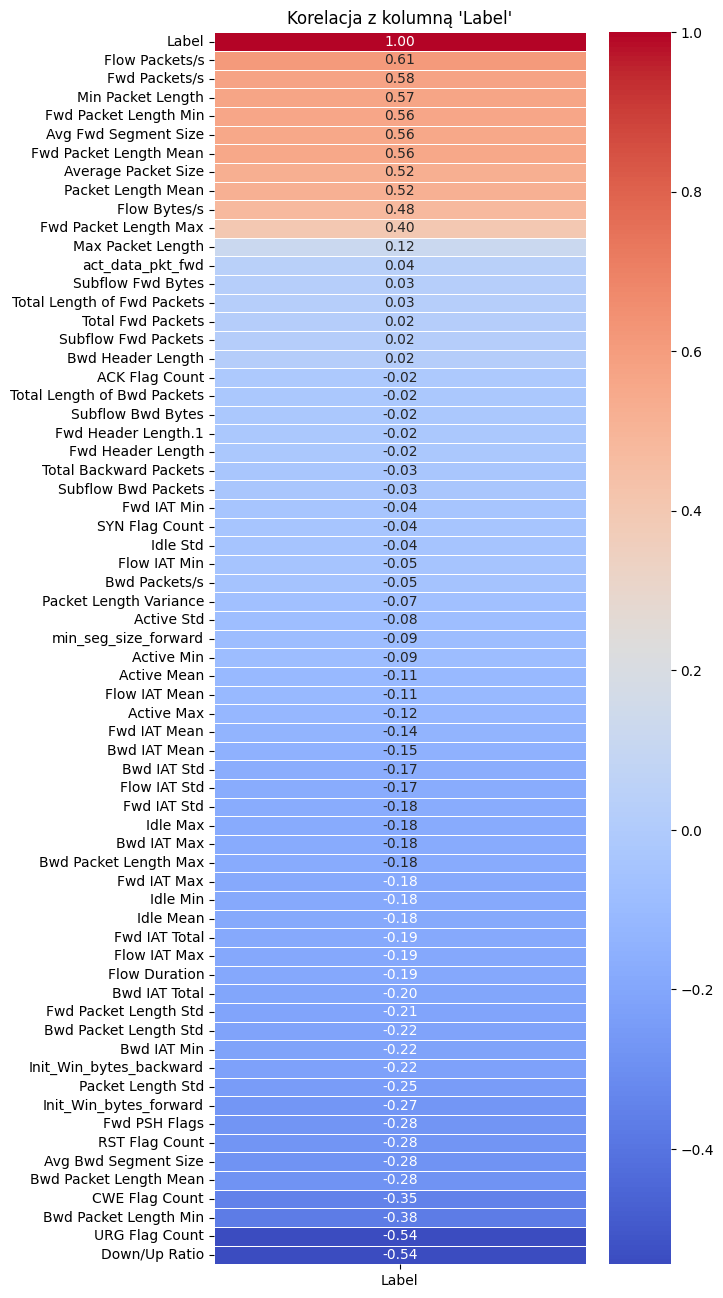

In [38]:
# wyświetlenie koleralcji cech z kolumną Label
correlation_with_binary_label = combined_df.corr()['Label'].sort_values(ascending=False)

plt.figure(figsize=(6, 16))
sns.heatmap(correlation_with_binary_label.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelacja z kolumną 'Label'")
plt.show()

In [39]:
# Zapis obrobionych danych do pliku CSV
combined_df.to_csv('2019.csv', index=False)

In [ ]:
# Wczytanie danych
df_2017 = pd.read_csv("2017.csv", low_memory=False)
df_2019 = pd.read_csv("2019.csv", low_memory=False)

In [ ]:
# Wyświetlenie wspólnych cech oraz unikalnych wartości dla obu zbiorów
features_2017 = set(df_2017.columns[:-1])
features_2019 = set(df_2019.columns[:-1])
features_2017_ordered = list(df_2017.columns[:-1])
common_features = [f for f in features_2017_ordered if f in features_2019]
unique_to_2017 = sorted(features_2017 - features_2019)
unique_to_2019 = sorted(features_2019 - features_2017)
print(f"Wspólnych cech: {len(common_features)}")
print(common_features)

print(f"Cechy tylko w 2017 ({len(unique_to_2017)}):")
print(unique_to_2017)

print(f"Cechy tylko w 2019 ({len(unique_to_2019)}):")
print(unique_to_2019)

Wspólnych cech: 64
['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow F

In [ ]:
label_col = df_2017.columns[-1]

# Nadpisywanie obu zbiorów tylko wspólnymi cechami + etykieta
df_2017 = df_2017[common_features + [label_col]]
df_2019 = df_2019[common_features + [label_col]]

In [ ]:
# zapis zbiorów do pliku
df_2017.to_csv('2017.csv', index=False)
df_2019.to_csv('2019.csv', index=False)